In [368]:
import numpy as np
import dtss as ds
import numpy.random as rnd
import scipy.linalg as la
from importlib import reload
reload(ds)
import scipy.signal as sp

In [371]:
nX = rnd.randint(1,5)
nX = 3
nY = rnd.randint(1,4)
nU = rnd.randint(1,4)
nY = 1
nU = 1
#print(nX,nU,nY)
P = ds.drss(nX,nU,nY)

A = np.array([[.5,0],
             [1,.7]])
B = np.array([[1.,0]]).T
C = B.T
D = np.zeros((1,1))

#P = ds.dtss(A,B,C,D,dt=1.)

Pmin = ds.minreal(P)

print(la.eigvals(P.A))
print(la.eigvals(Pmin.A))


[ 0.03354481+0.j  0.00234691+0.j -0.02080421+0.j]
[ 0.03354481+0.j  0.00234691+0.j -0.02080421+0.j]


In [372]:
Pbal = ds.balancedRealization(P)
A,B,C,D = ds.extract_matrices(Pbal)
print(la.eigvals(A))
Xc = ds.controllabilityGramian(A,B)
Yo = ds.observabilityGramian(A,C)
print(np.around(Xc,5))
print(np.around(Yo,5))

[ 0.03354481+0.j  0.00234691+0.j -0.02080421+0.j]
[[ 1.47629e+00 -0.00000e+00 -0.00000e+00]
 [-0.00000e+00  5.00000e-04 -0.00000e+00]
 [-0.00000e+00 -0.00000e+00  0.00000e+00]]
[[ 1.47629e+00 -0.00000e+00  0.00000e+00]
 [-0.00000e+00  5.00000e-04 -0.00000e+00]
 [ 0.00000e+00 -0.00000e+00  0.00000e+00]]


In [298]:
D

array([[0.]])

In [7]:
nX1 = rnd.randint(1,5)
nY1 = rnd.randint(1,5)
nU1 = rnd.randint(1,5)

nX2 = rnd.randint(1,5)
nY2 = rnd.randint(1,5)
nU2 = nY1

specRad = lambda A : np.max(np.abs(la.eigvals(A)))

def rss(nX,nU,nY,rho=.9):
    A = rnd.randn(nX,nX)
    u = rnd.rand()
    A = A * u / specRad(A)
    B = rnd.randn(nX,nU)
    C = rnd.randn(nY,nX)
    D = rnd.randn(nY,nU)
    
    return (A,B,C,D,1.)

SS1 = rss(nX1,nU1,nY1)
SS2 = rss(nX2,nU2,nY2)

#SS1 = (np.array([[.5]]),np.ones((1,1)),np.ones((1,1)),np.ones((1,1)),1)
#SS2 = (np.array([[.5]]),np.ones((1,1)),np.ones((1,1)),np.ones((1,1)),1)

def addSS(P1,P2):
    A1,B1,C1,D1,dt = P1
    A2,B2,C2,D2,dt = P2
    BigA = la.block_diag(A1,A2)
    BigB = np.vstack([B1,B2])
    BigC = np.hstack([C1,C2])
    BigD = D1+D2
    
    return (BigA,BigB,BigC,BigD,dt)

def addSP(P1,P2):
    dt = P1.dt
    Sum = P1 + P2
    return sp.StateSpace(Sum.A,Sum.B,Sum.C,Sum.D,dt=dt)


#AddSP = addSP(sp.StateSpace(*SS1[:4],dt=SS1[4]),sp.StateSpace(*SS2[:4],dt=SS2[4]))
#AddSP = sp.dlti(AddSP,dt=1)

#AddSimple = sp.StateSpace(*SS1[:4],dt=SS1[4]) + sp.StateSpace(*SS2[:4],dt=SS2[4])

#AddCheck = addSS(SS1,SS2)

P1 = sp.StateSpace(*SS1[:4],dt=SS1[4])
P2 = sp.StateSpace(*SS2[:4],dt=SS2[4])
MulSimple = P2 * P1
MulSimple

StateSpaceContinuous(
array([[-0.49527399,  0.26858049,  1.3765811 , -0.46795454,  2.2849781 ],
       [ 0.        , -0.12047757,  0.04186779, -0.17036731,  0.01152447],
       [ 0.        ,  0.17377205, -0.00699216, -0.08518412, -0.04248639],
       [ 0.        , -0.02329347,  0.13473025, -0.06871055,  0.03233508],
       [ 0.        , -0.00738347,  0.10219264,  0.11541965, -0.09675831]]),
array([[-3.5081595 , -1.95549899],
       [ 0.6946791 ,  0.35830829],
       [-1.49416218, -0.15722265],
       [-1.48177823, -1.9673176 ],
       [-1.267761  , -0.35364487]]),
array([[ 0.49523548, -0.58651049,  0.26364663,  0.15783797,  0.52674373],
       [ 0.32935165, -0.66938404,  0.22499949, -0.18277682, -1.81943923]]),
array([[0.25234205, 0.31351559],
       [0.98517108, 1.48851347]]),
dt: None
)

In [ ]:
M

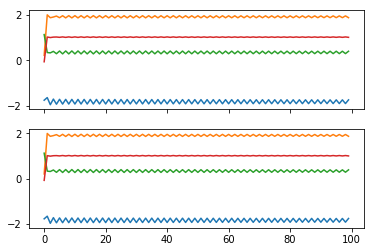

In [59]:
TCheck,YCheck = sp.dstep(AddCheck)
T,Y = AddSP.step()
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(TCheck,YCheck[0])
ax[1].plot(T,Y[0])

In [4]:
AddSimple

StateSpaceContinuous(
array([[ 0.0075911 ,  0.31375773,  0.04791251,  0.        ],
       [ 0.13019438,  0.09245239,  0.46593098,  0.        ],
       [ 0.29844044, -0.62320285,  0.28436155,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.33410694]]),
array([[ 0.9310841 , -0.8275494 ],
       [-0.09156484, -0.38570978],
       [-0.4534498 ,  0.40104955],
       [ 0.14261407,  1.37630124]]),
array([[-8.00897703e-01, -1.67313818e-01,  1.08575242e+00,
        -4.03796865e-02],
       [ 1.31358928e-03, -1.85449648e-03,  3.25966001e-01,
         3.02032003e+00],
       [-1.74949099e+00, -8.17753704e-01,  7.69047315e-01,
         1.50461763e-01],
       [-1.26010876e-01, -2.14089674e-01,  9.49188556e-01,
        -6.78584822e-01]]),
array([[ 0.45446515,  0.89149546],
       [-2.04117056, -1.89915763],
       [-0.04359186,  2.0779688 ],
       [ 0.98523397,  0.54436762]]),
dt: None
)

In [1]:
import scipy
scipy.__version__

'1.2.1'